# **CV PROJECT: Bone Tumor X-Ray Detection & Classification**

## **ENVIRONMENT SETUP & EDA:**

Author :Karthik

**IMPORT LIBRARIES:**

In [ ]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import time
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)



from tqdm import tqdm
import glob

**PATH DEFINITIONS:**

In [2]:
# Path setup
BASE_DIR = r"F:\NW_MSDS\Term-6\CV\Project\project_week_10\BTXRD"
IMG_DIR = os.path.join(BASE_DIR,"BTXRD", "images")
ANNOTATION_DIR = os.path.join(BASE_DIR,"BTXRD", "Annotations")
EXCEL_PATH = os.path.join(BASE_DIR, "BTXRD",'metadata',"dataset.xlsx")

**LOAD METADATA:**

In [3]:
df = pd.read_excel(EXCEL_PATH)
print("Dataframe Size: ",df.shape)
df.head()

Dataframe Size:  (3746, 37)


,image_id,center,age,gender,hand,ulna,radius,humerus,foot,tibia,fibula,femur,hip bone,ankle-joint,knee-joint,hip-joint,wrist-joint,elbow-joint,shoulder-joint,tumor,benign,malignant,osteochondroma,multiple osteochondromas,simple bone cyst,giant cell tumor,osteofibroma,synovial osteochondroma,other bt,osteosarcoma,other mt,upper limb,lower limb,pelvis,frontal,lateral,oblique
0,IMG000001.jpeg,1,48,F,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
1,IMG000002.jpeg,1,12,M,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2,IMG000003.jpeg,1,12,M,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,IMG000004.jpeg,1,52,M,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,IMG000005.jpeg,1,52,M,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [4]:
def get_label(row):
    if row['tumor']== 0:
        return 'Normal'
    elif row['benign']==1:
        return 'Benign'
    elif row['malignant']==1:
        return 'Malignant'
    return 'Unknown'


df['label'] = df.apply(get_label,axis=1)
df['image_path'] = df['image_id'].apply(lambda x: os.path.join(IMG_DIR,x))
df.head()

,image_id,center,age,gender,hand,ulna,radius,humerus,foot,tibia,fibula,femur,hip bone,ankle-joint,knee-joint,hip-joint,wrist-joint,elbow-joint,shoulder-joint,tumor,benign,malignant,osteochondroma,multiple osteochondromas,simple bone cyst,giant cell tumor,osteofibroma,synovial osteochondroma,other bt,osteosarcoma,other mt,upper limb,lower limb,pelvis,frontal,lateral,oblique,label,image_path
0,IMG000001.jpeg,1,48,F,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,Malignant,F:\NW_MSDS\Term-6\CV\Project\project_week_10\B...
1,IMG000002.jpeg,1,12,M,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,Malignant,F:\NW_MSDS\Term-6\CV\Project\project_week_10\B...
2,IMG000003.jpeg,1,12,M,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,Malignant,F:\NW_MSDS\Term-6\CV\Project\project_week_10\B...
3,IMG000004.jpeg,1,52,M,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,Malignant,F:\NW_MSDS\Term-6\CV\Project\project_week_10\B...
4,IMG000005.jpeg,1,52,M,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,Malignant,F:\NW_MSDS\Term-6\CV\Project\project_week_10\B...


**SAMPLE XRAY VIEWER:**

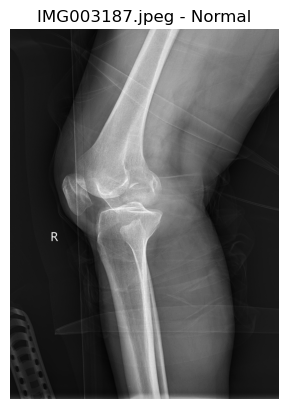

In [5]:
def show_xray(idx):
    row = df.iloc[idx]
    img = cv2.imread(row['image_path'], cv2.IMREAD_GRAYSCALE)
    if img is not None:
        plt.imshow(img, cmap='gray')
        plt.title(f"{row['image_id']} - {row['label']}")
        plt.axis('off')
        plt.show()
    else:
        print("Image not found.")

# Random sample
show_xray(df[df['label'] != 'Unknown'].sample(1).index[0])

**PARSE ANNOTATIONS:**

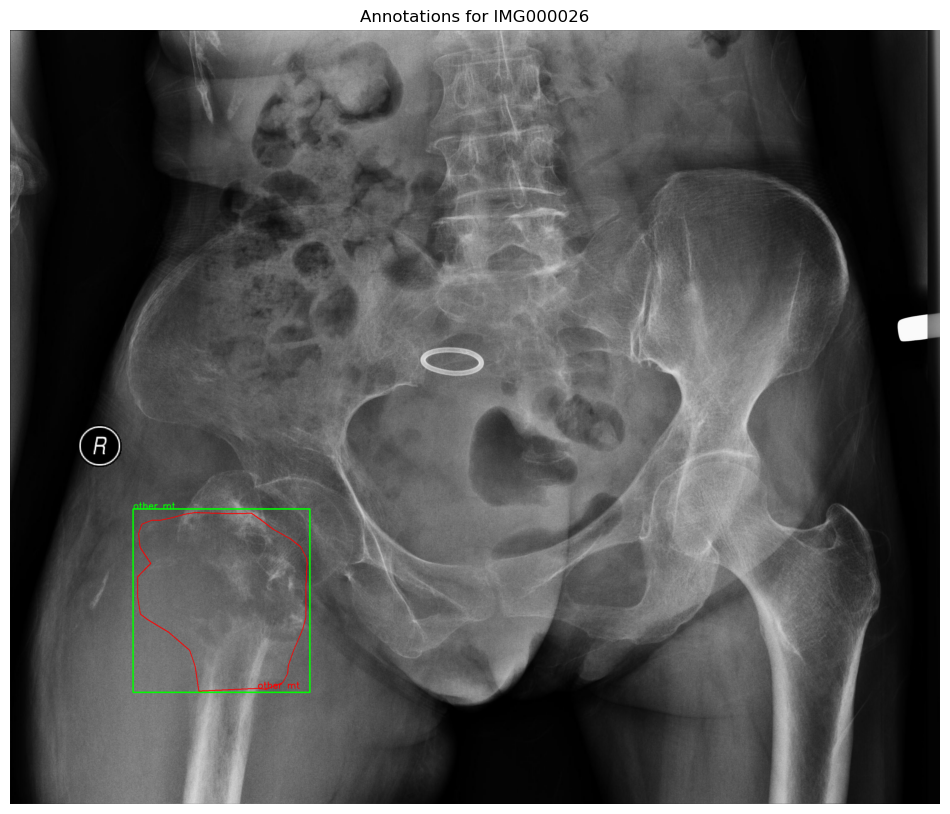

In [14]:
def load_annotation(image_id):
    json_path = os.path.join(ANNOTATION_DIR, f"{image_id}.json")
    if os.path.exists(json_path):
        with open(json_path, 'r') as f:
            return json.load(f)
    return None


def draw_annotation(image_id):
    ann = load_annotation(image_id)
    if not ann:
        print(f"No annotation found for {image_id}")
        return

    img_path = os.path.join(IMG_DIR, ann['imagePath'])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    for shape in ann['shapes']:
        label = shape['label']
        pts = shape['points']
        if shape['shape_type'] == 'rectangle':
            pt1, pt2 = tuple(map(int, pts[0])), tuple(map(int, pts[1]))
            cv2.rectangle(img, pt1, pt2, (0,255,0), 3)
            cv2.putText(img, label, pt1, cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
        elif shape['shape_type'] == 'polygon':
            polygon = np.array(pts, np.int32).reshape((-1, 1, 2))
            cv2.polylines(img, [polygon], isClosed=True, color=(255,0,0), thickness=2)
            cv2.putText(img, label, tuple(map(int, pts[0])), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)

    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    plt.title(f"Annotations for {image_id}")
    plt.axis('off')
    plt.show()

#draw_annotation('IMG000529')
draw_annotation('IMG000026')


---
# **EDA:**
**GENDER BASED CLASS DISTRIBUTION:**

In [7]:
counts = df.groupby(['label','gender']).size().reset_index(name='count')
counts['gender_percentage'] = (counts['count']/len(df))*100
counts

,label,gender,count,gender_percentage
0,Benign,F,630,16.817939
1,Benign,M,895,23.892152
2,Malignant,F,162,4.324613
3,Malignant,M,180,4.805125
4,Normal,F,856,22.851041
5,Normal,M,1023,27.309130


**CLASS DISTRIBUTION | AGE BASED TUMOR DISTRIBUTION | GENDER BASED:**

C:\Users\ek_36\AppData\Local\Temp\ipykernel_26716\3071453367.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='label',palette='mako')


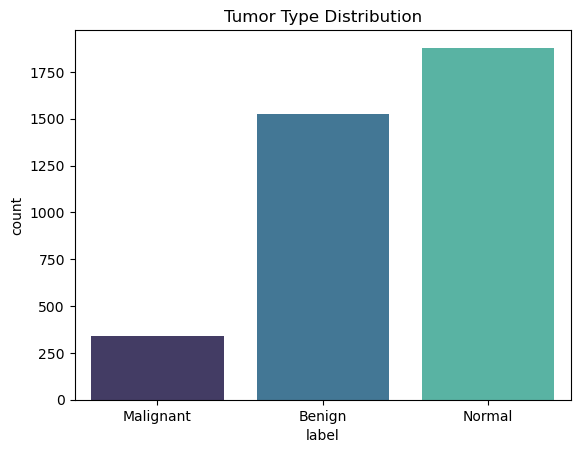

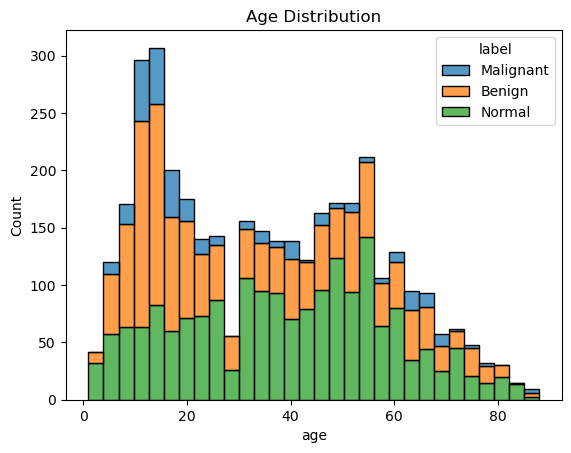

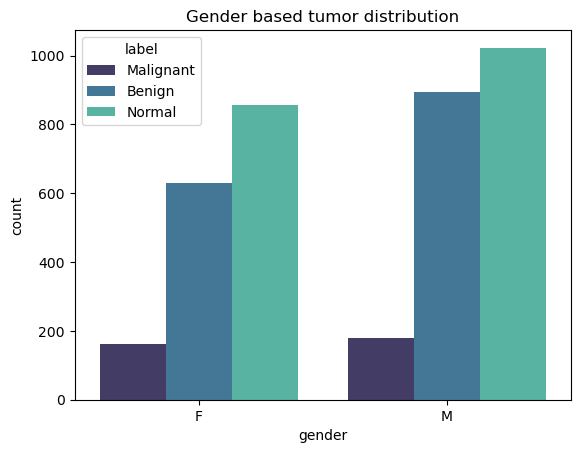

In [8]:
sns.countplot(data=df,x='label',palette='mako')
plt.title('Tumor Type Distribution')
plt.show()

sns.histplot(data=df,multiple = 'stack', hue='label',x='age',bins=30)
plt.title('Age Distribution')
plt.show()

sns.countplot(data=df, x='gender',palette = 'mako',hue='label')
plt.title('Gender based tumor distribution')
plt.show()

**BODY PARTS ANALYSIS:**

C:\Users\ek_36\AppData\Local\Temp\ipykernel_26716\88506487.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=body_counts.index,y=body_counts.values,palette='viridis')


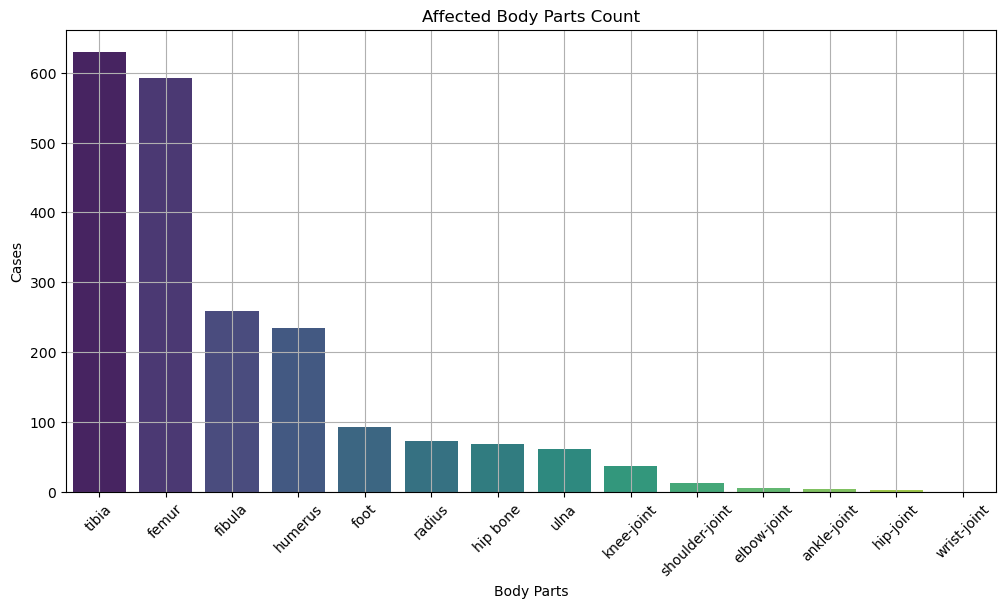

In [28]:
body_part_cols = [
    'ulna', 'radius', 'humerus', 'foot', 'tibia', 'fibula',
    'femur', 'hip bone', 'ankle-joint', 'knee-joint', 'hip-joint',
    'wrist-joint', 'elbow-joint', 'shoulder-joint'
]

body_counts = df[body_part_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=body_counts.index,y=body_counts.values,palette='viridis')
plt.title('Affected Body Parts (Frequency)')
plt.title('Affected Body Parts Count')
plt.xticks(rotation=45)
plt.xlabel('Body Parts')
plt.ylabel('Cases')
plt.grid()
plt.show()

**TUMOR AREA %:**

In [ ]:
# TUMOR AREA ANALYSIS (EDA)
# Get annotated image IDs from the JSON filenames
annotation_files = glob.glob(os.path.join(ANNOTATION_DIR, "*.json"))
annotated_ids = [os.path.splitext(os.path.basename(f))[0] for f in annotation_files]

# Clean and align image_id column to match JSON filenames
df['image_id_clean'] = df['image_id'].astype(str).str.replace('.jpeg', '', case=False).str.strip()

# Filter to only annotated images
df_annotated = df[df['image_id_clean'].isin(annotated_ids)].copy()
print(f"Annotated entries: {df_annotated.shape[0]}")

# Function to calculate polygon or rectangle tumor area %
def calculate_tumor_area_percentage(ann):
    width = ann['imageWidth']
    height = ann['imageHeight']
    image_area = width * height

    total_area = 0
    for shape in ann['shapes']:
        pts = shape['points']
        if shape['shape_type'] == 'rectangle':
            (x1, y1), (x2, y2) = pts
            total_area += abs((x2 - x1) * (y2 - y1))
        elif shape['shape_type'] == 'polygon':
            pts = np.array(pts)
            x = pts[:, 0]
            y = pts[:, 1]
            total_area += 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

    return 100 * total_area / image_area

# Load annotation and compute area column
def compute_tumor_area_column(df_subset):
    area_list = []
    for image_id in tqdm(df_subset['image_id_clean']):
        ann = load_annotation(image_id)
        if ann:
            try:
                area_pct = calculate_tumor_area_percentage(ann)
            except Exception as e:
                print(f"Error in {image_id}: {e}")
                area_pct = np.nan
        else:
            area_pct = np.nan
        area_list.append(area_pct)

    df_subset['tumor_area_pct'] = area_list
    return df_subset

df_annotated = compute_tumor_area_column(df_annotated)


Annotated entries: 1867


  0%|          | 0/1867 [00:00<?, ?it/s]

100%|██████████| 1867/1867 [00:00<00:00, 4975.85it/s]


Tumor Area Percentage Visualization : Histogram:

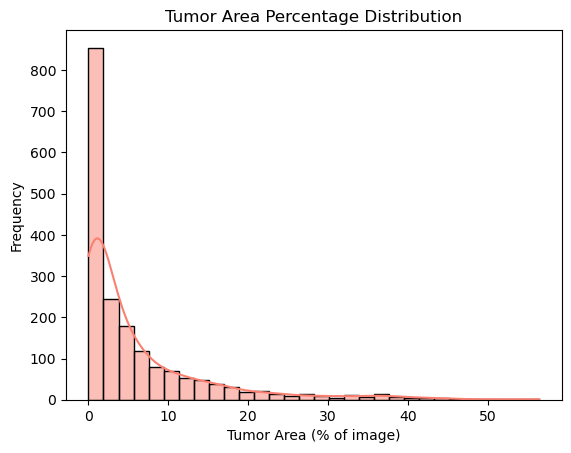

C:\Users\ek_36\AppData\Local\Temp\ipykernel_26716\3287503613.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_annotated, x='label', y='tumor_area_pct', palette='Set2')


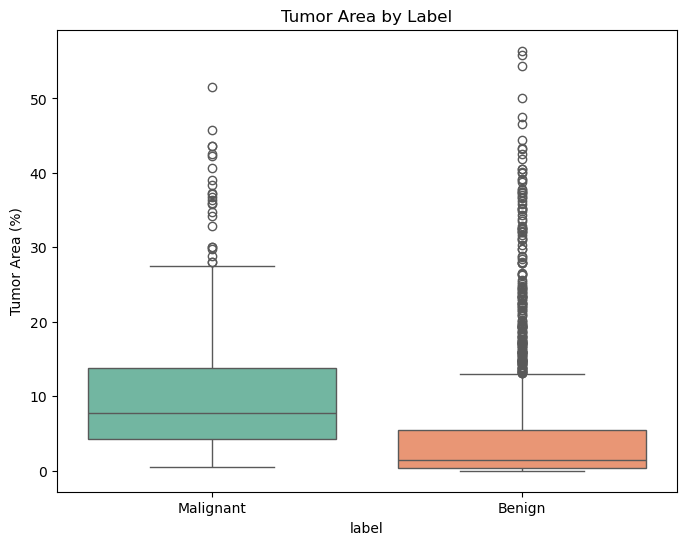

In [ ]:

# Histogram:
sns.histplot(df_annotated['tumor_area_pct'].dropna(), bins=30, kde=True, color='salmon')
plt.title("Tumor Area Percentage Distribution")
plt.xlabel("Tumor Area (% of image)")
plt.ylabel("Frequency")
plt.show()

# Boxplot:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_annotated, x='label', y='tumor_area_pct', palette='Set2')
plt.title("Tumor Area by Label")
plt.ylabel("Tumor Area (%)")
plt.show()


In [12]:
valid_areas = df_annotated['tumor_area_pct'].dropna()
avg_tumor_coverage = valid_areas.mean()
print(f"Average tumor coverage: {avg_tumor_coverage:.2f}%")


Average tumor coverage: 5.99%


In [13]:
df_annotated.columns

Index(['image_id', 'center', 'age', 'gender', 'hand', 'ulna', 'radius',
       'humerus', 'foot', 'tibia', 'fibula', 'femur', 'hip bone',
       'ankle-joint', 'knee-joint', 'hip-joint', 'wrist-joint', 'elbow-joint',
       'shoulder-joint', 'tumor', 'benign', 'malignant', 'osteochondroma',
       'multiple osteochondromas', 'simple bone cyst', 'giant cell tumor',
       'osteofibroma', 'synovial osteochondroma', 'other bt', 'osteosarcoma',
       'other mt', 'upper limb', 'lower limb', 'pelvis', 'frontal', 'lateral',
       'oblique', 'label', 'image_path', 'image_id_clean', 'tumor_area_pct'],
      dtype='object')

**DIFFICULTY_SOCRE:**

In [19]:
def compute_difficulty(row):
    score = 0

    # Tumor type (binary columns)
    if row['osteochondroma'] == 1 or row['simple bone cyst'] == 1:
        score += 0  # Easy
    elif row['osteosarcoma'] == 1 or row['other mt'] == 1:
        score += 2  # Hard
    else:
        score += 1  # Moderate

    # View angle
    if row['frontal']==1:
        score += 0
    elif row['lateral']==1:
        score += 1
    else:  # oblique or others
        score += 2

    # Age
    if row['age'] < 15 or row['age'] > 70:
        score += 2
    elif 15 <= row['age'] <= 20 or 60 <= row['age'] <= 70:
        score += 1

    easy_sites = ['femur', 'tibia', 'knee-joint', 'hand']
    hard_sites = ['foot', 'fibula', 'hip bone', 'ankle-joint']

    if any(row[site] == 1 for site in easy_sites):
        score += 0
    elif any(row[site] == 1 for site in hard_sites):
        score += 2
    else:
        score += 1  

    return score

df['difficulty_score'] = df.apply(compute_difficulty, axis=1)

df['difficulty_level'] = df['difficulty_score'].apply(
    lambda x: 'easy' if x <= 2 else 'medium' if x <= 4 else 'hard'
)


In [20]:
df.head()

,image_id,center,age,gender,hand,ulna,radius,humerus,foot,tibia,fibula,femur,hip bone,ankle-joint,knee-joint,hip-joint,wrist-joint,elbow-joint,shoulder-joint,tumor,benign,malignant,osteochondroma,multiple osteochondromas,simple bone cyst,giant cell tumor,osteofibroma,synovial osteochondroma,other bt,osteosarcoma,other mt,upper limb,lower limb,pelvis,frontal,lateral,oblique,label,image_path,image_id_clean,difficulty_score,difficulty_level
0,IMG000001.jpeg,1,48,F,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,Malignant,F:\NW_MSDS\Term-6\CV\Project\project_week_10\B...,IMG000001,4,medium
1,IMG000002.jpeg,1,12,M,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,Malignant,F:\NW_MSDS\Term-6\CV\Project\project_week_10\B...,IMG000002,4,medium
2,IMG000003.jpeg,1,12,M,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,Malignant,F:\NW_MSDS\Term-6\CV\Project\project_week_10\B...,IMG000003,5,hard
3,IMG000004.jpeg,1,52,M,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,Malignant,F:\NW_MSDS\Term-6\CV\Project\project_week_10\B...,IMG000004,4,medium
4,IMG000005.jpeg,1,52,M,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,Malignant,F:\NW_MSDS\Term-6\CV\Project\project_week_10\B...,IMG000005,6,hard


**SAVE FILES:**

In [21]:
METADATA_DIR = os.path.join(BASE_DIR,"BTXRD","metadata")

df.to_excel(os.path.join(METADATA_DIR,'main_dataframe.xlsx'),index=False)
df_annotated.to_excel(os.path.join(METADATA_DIR,'annotated_dataframe.xlsx'),index=False)